# Analysis of the results

This notebook will contain the analysis of all of the results from all of the models.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import RcParams
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

classification_results_df = pd.read_csv('../results/pretrained_classification_results_full.csv')

classification_results_df

,Model Name,Top 1%,Top 5%
0,PretrainedCustomResNet152_Last2Layers,63.957096,95.205482


Creating dataframe of losses for all models

In [2]:
loss_df = pd.read_csv('../models/predefined/state/loss_values_full.csv')
models = loss_df['Model Name'].unique()
loss_df


,Epochs,Training Loss,Testing Loss,Model Name
0,1,1.880018,1.534634,PretrainedCustomResNet152_Last2Layers
1,2,1.374970,1.352168,PretrainedCustomResNet152_Last2Layers
2,3,1.184277,1.256646,PretrainedCustomResNet152_Last2Layers
3,4,1.055498,1.202648,PretrainedCustomResNet152_Last2Layers
4,5,0.952371,1.169682,PretrainedCustomResNet152_Last2Layers
5,6,0.875185,1.154404,PretrainedCustomResNet152_Last2Layers
6,7,0.804584,1.155971,PretrainedCustomResNet152_Last2Layers
7,8,0.741190,1.130131,PretrainedCustomResNet152_Last2Layers
8,9,0.681693,1.134991,PretrainedCustomResNet152_Last2Layers
9,10,0.627425,1.161208,PretrainedCustomResNet152_Last2Layers


In [3]:
models

array(['PretrainedCustomResNet152_Last2Layers'], dtype=object)

Setting Seaborn theme and styling

In [4]:
myrcparams = RcParams({'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.grid': True,
          'axes.labelcolor': '.15',
          'axes.linewidth': 0.0,
          'figure.facecolor': 'white',
          'font.family': ['serif'],
          'grid.color': 'white',
          'grid.linestyle': '--',
          'image.cmap': 'Greys',
          'legend.frameon': False,
          'legend.numpoints': 1,
          'legend.scatterpoints': 1,
          'lines.solid_capstyle': 'round',
          'text.color': '.15',
          'xtick.color': '.15',
          'xtick.direction': 'out',
          'xtick.major.size': 0.0,
          'xtick.minor.size': 0.0,
          'ytick.color': '.15',
          'ytick.direction': 'out',
          'ytick.major.size': 0.0,
          'ytick.minor.size': 0.0})

plt.style.library['seaborn-whitegrid']
RcParams.update(myrcparams)

## Plotting Testing and Training Losses for All Models
- Two separate graphs for testing and training loss, allowing a visual comparison of all the models

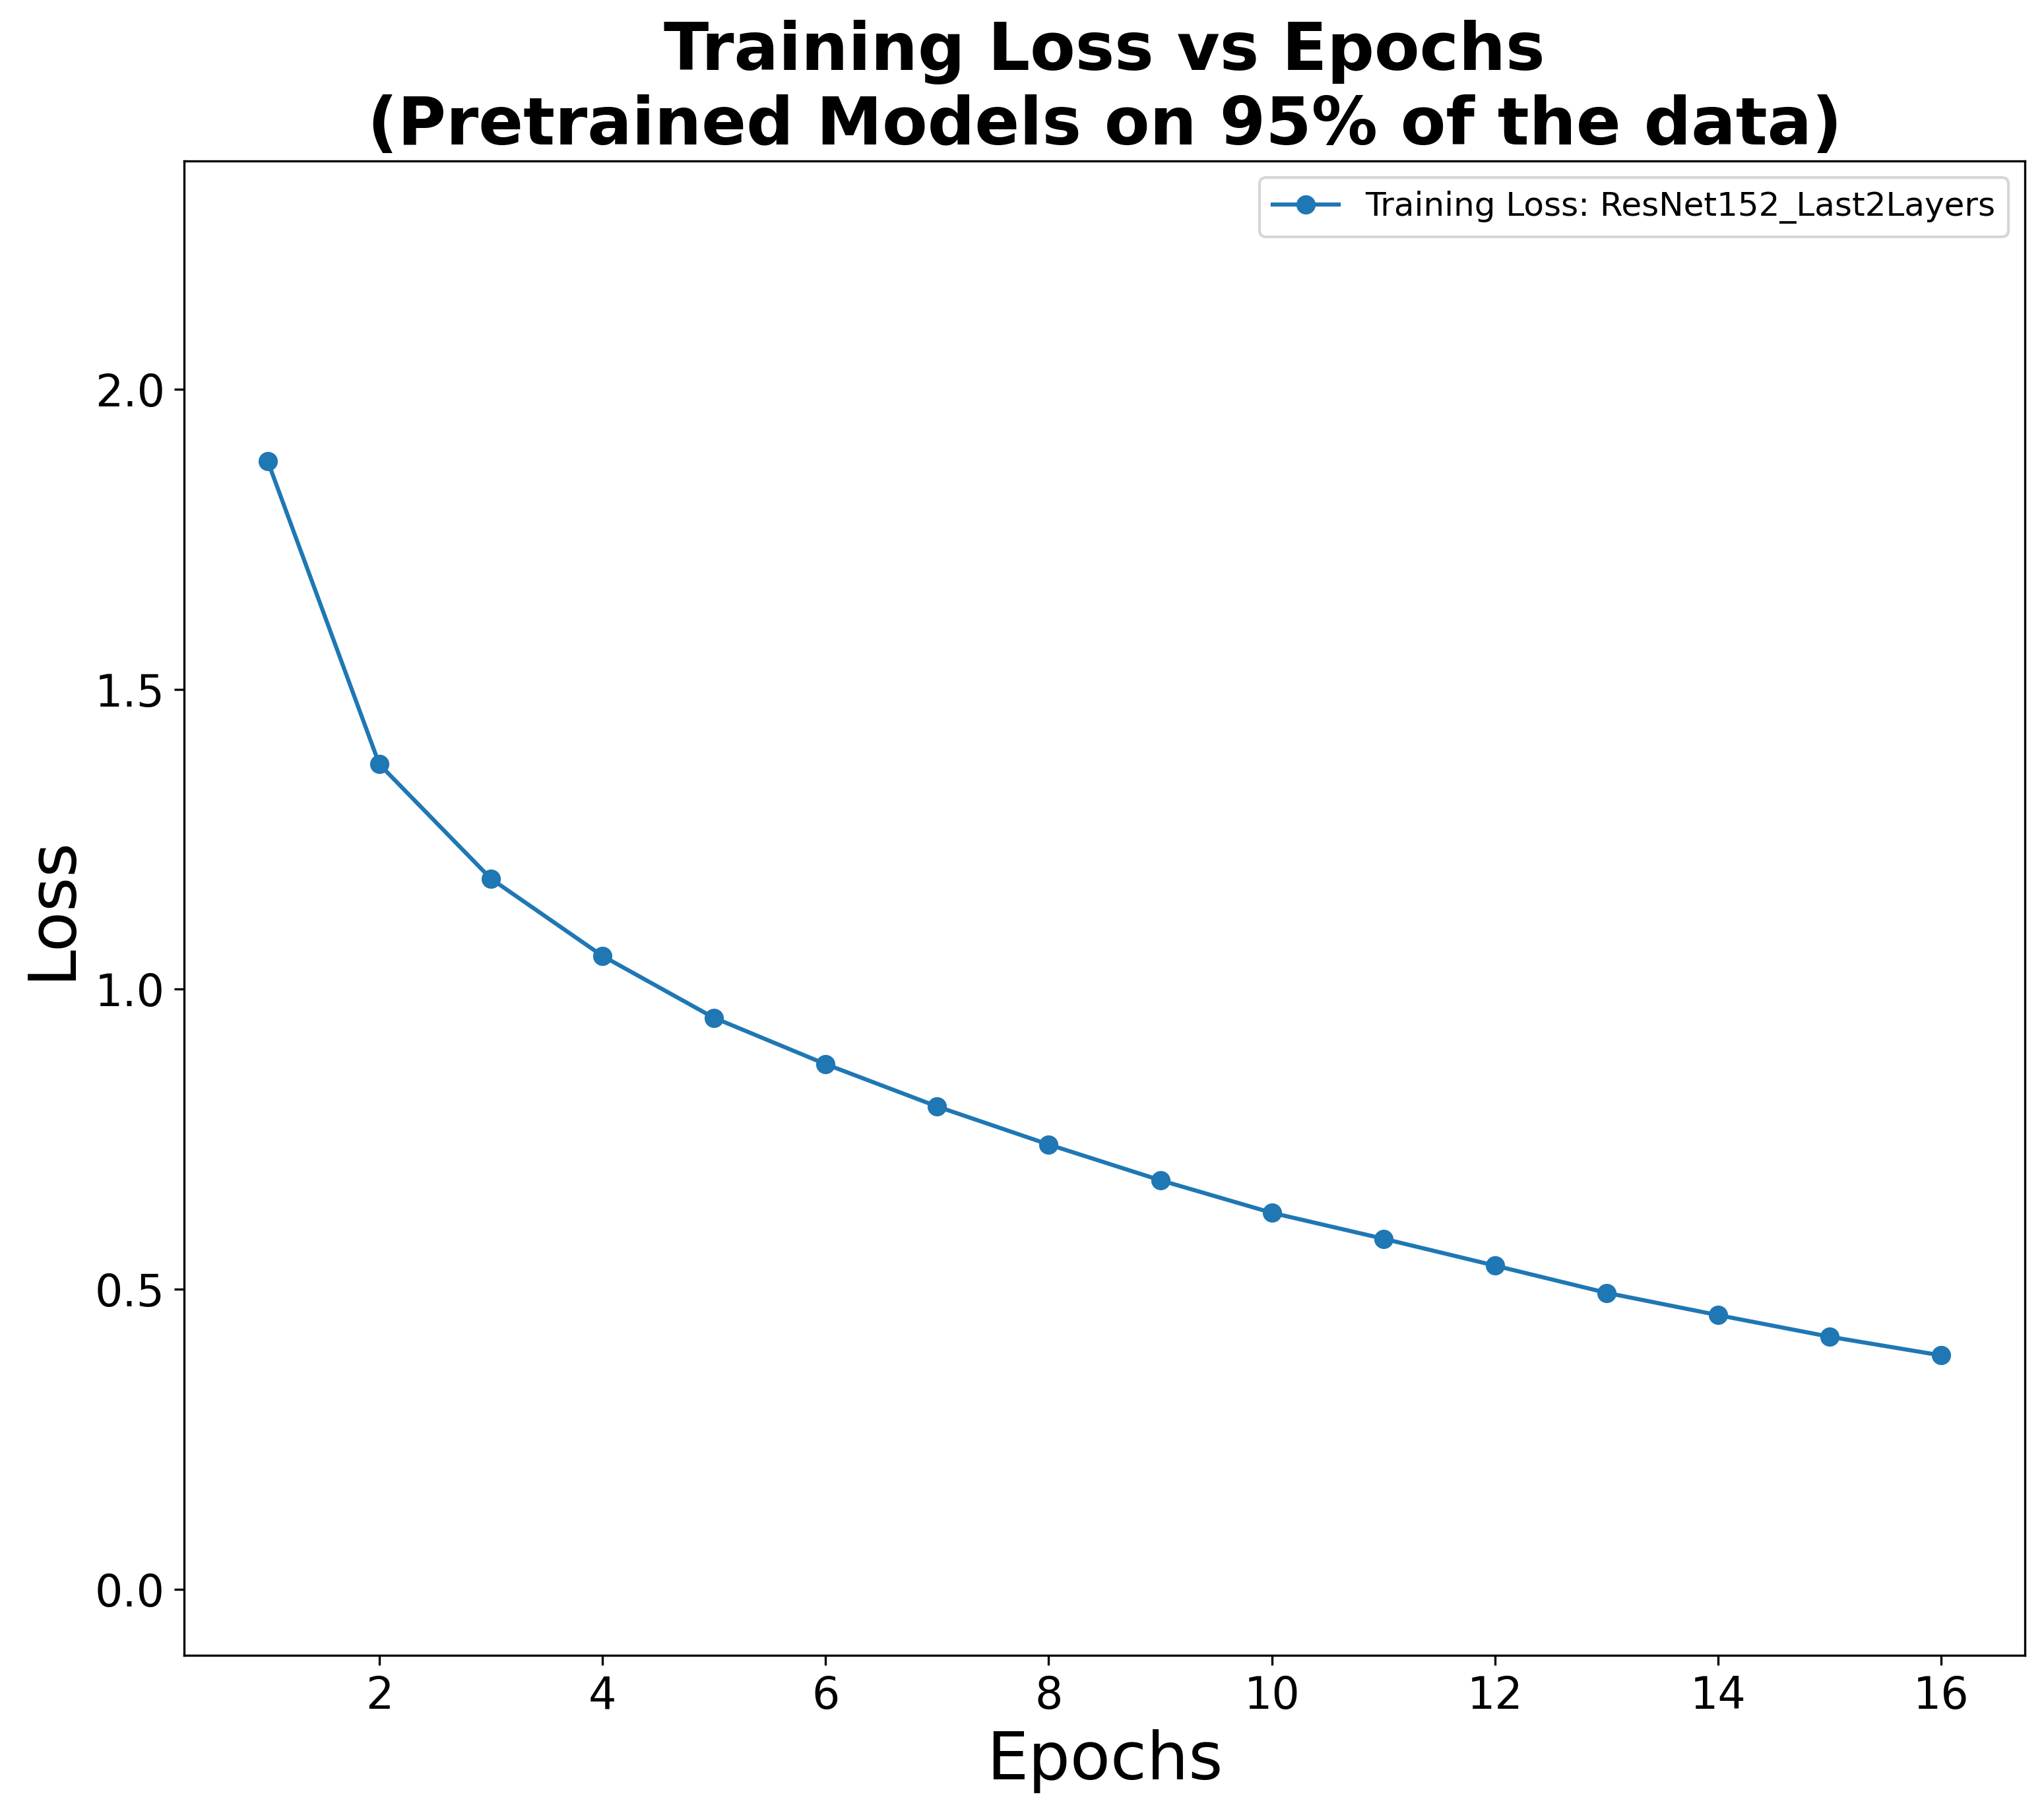

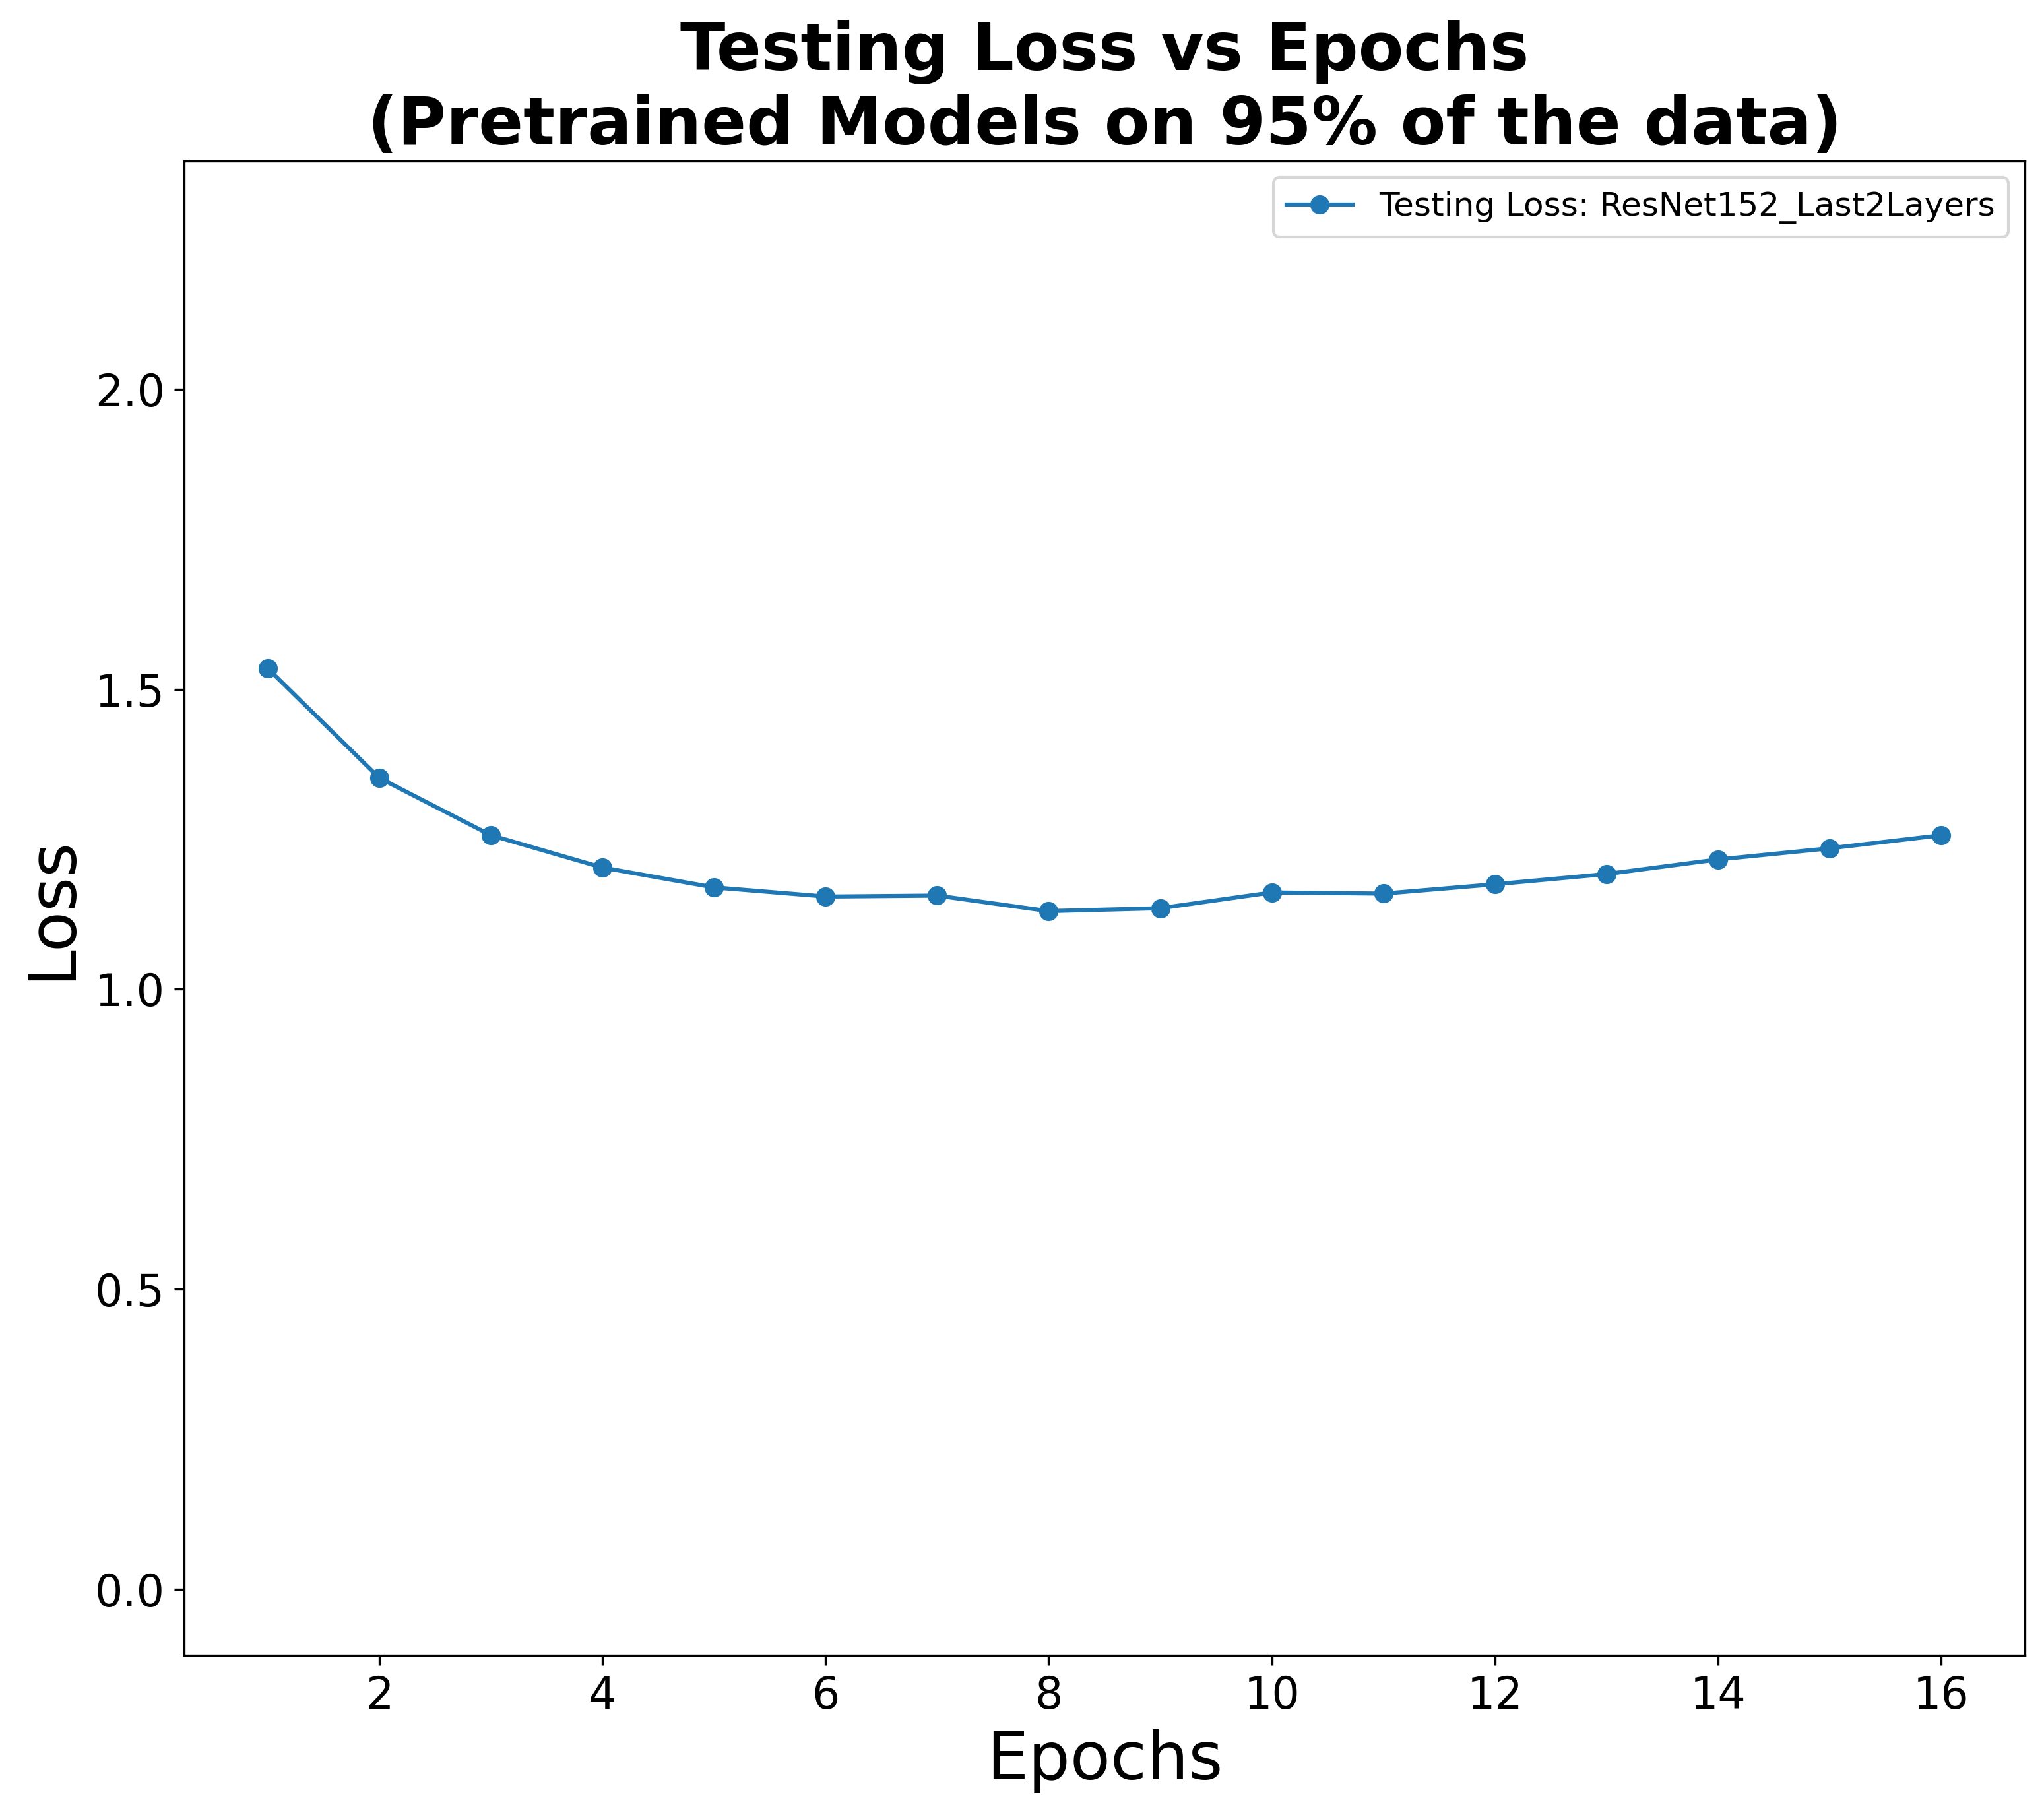

In [5]:
# getting max yval so that plots have same y-axis for better comparison 
max_yval = np.maximum(loss_df['Training Loss'], loss_df['Testing Loss']).max()
min_yval = np.minimum(loss_df['Training Loss'], loss_df['Testing Loss']).min()

# getting the two graphs for testing and training loss 
for loss in ['Training Loss', 'Testing Loss']:
    fig, ax = plt.subplots(figsize = (12,10), dpi = 300)
    for model in models:
        ax.plot(loss_df[loss_df['Model Name'] == model]['Epochs'], loss_df[loss_df['Model Name'] == model][loss], '-o', label = loss + ": " + model.replace('PretrainedCustom', ''), linewidth = 1.5)
        ax.set_xlabel("Epochs", fontsize = 24)
        ax.set_ylabel("Loss", fontsize = 24)
        ax.tick_params(
            axis = 'both',
            labelsize = 16)
        ax.legend(fontsize = 12)
        ax.set_ylim([min_yval - 0.5, max_yval + 0.5])
        ax.set_title(loss + " vs Epochs\n(Pretrained Models on 95% of the data)", fontsize = 24, fontweight = 'bold')
    plt.savefig("output/Pretrained " + loss + " vs Epochs (95% of the data).jpg", dpi = 300, bbox_inches = 'tight')
    plt.savefig("output/Pretrained " + loss + " vs Epochs (95% of the data).pdf", dpi = 300, bbox_inches = 'tight')    
    plt.show()
        

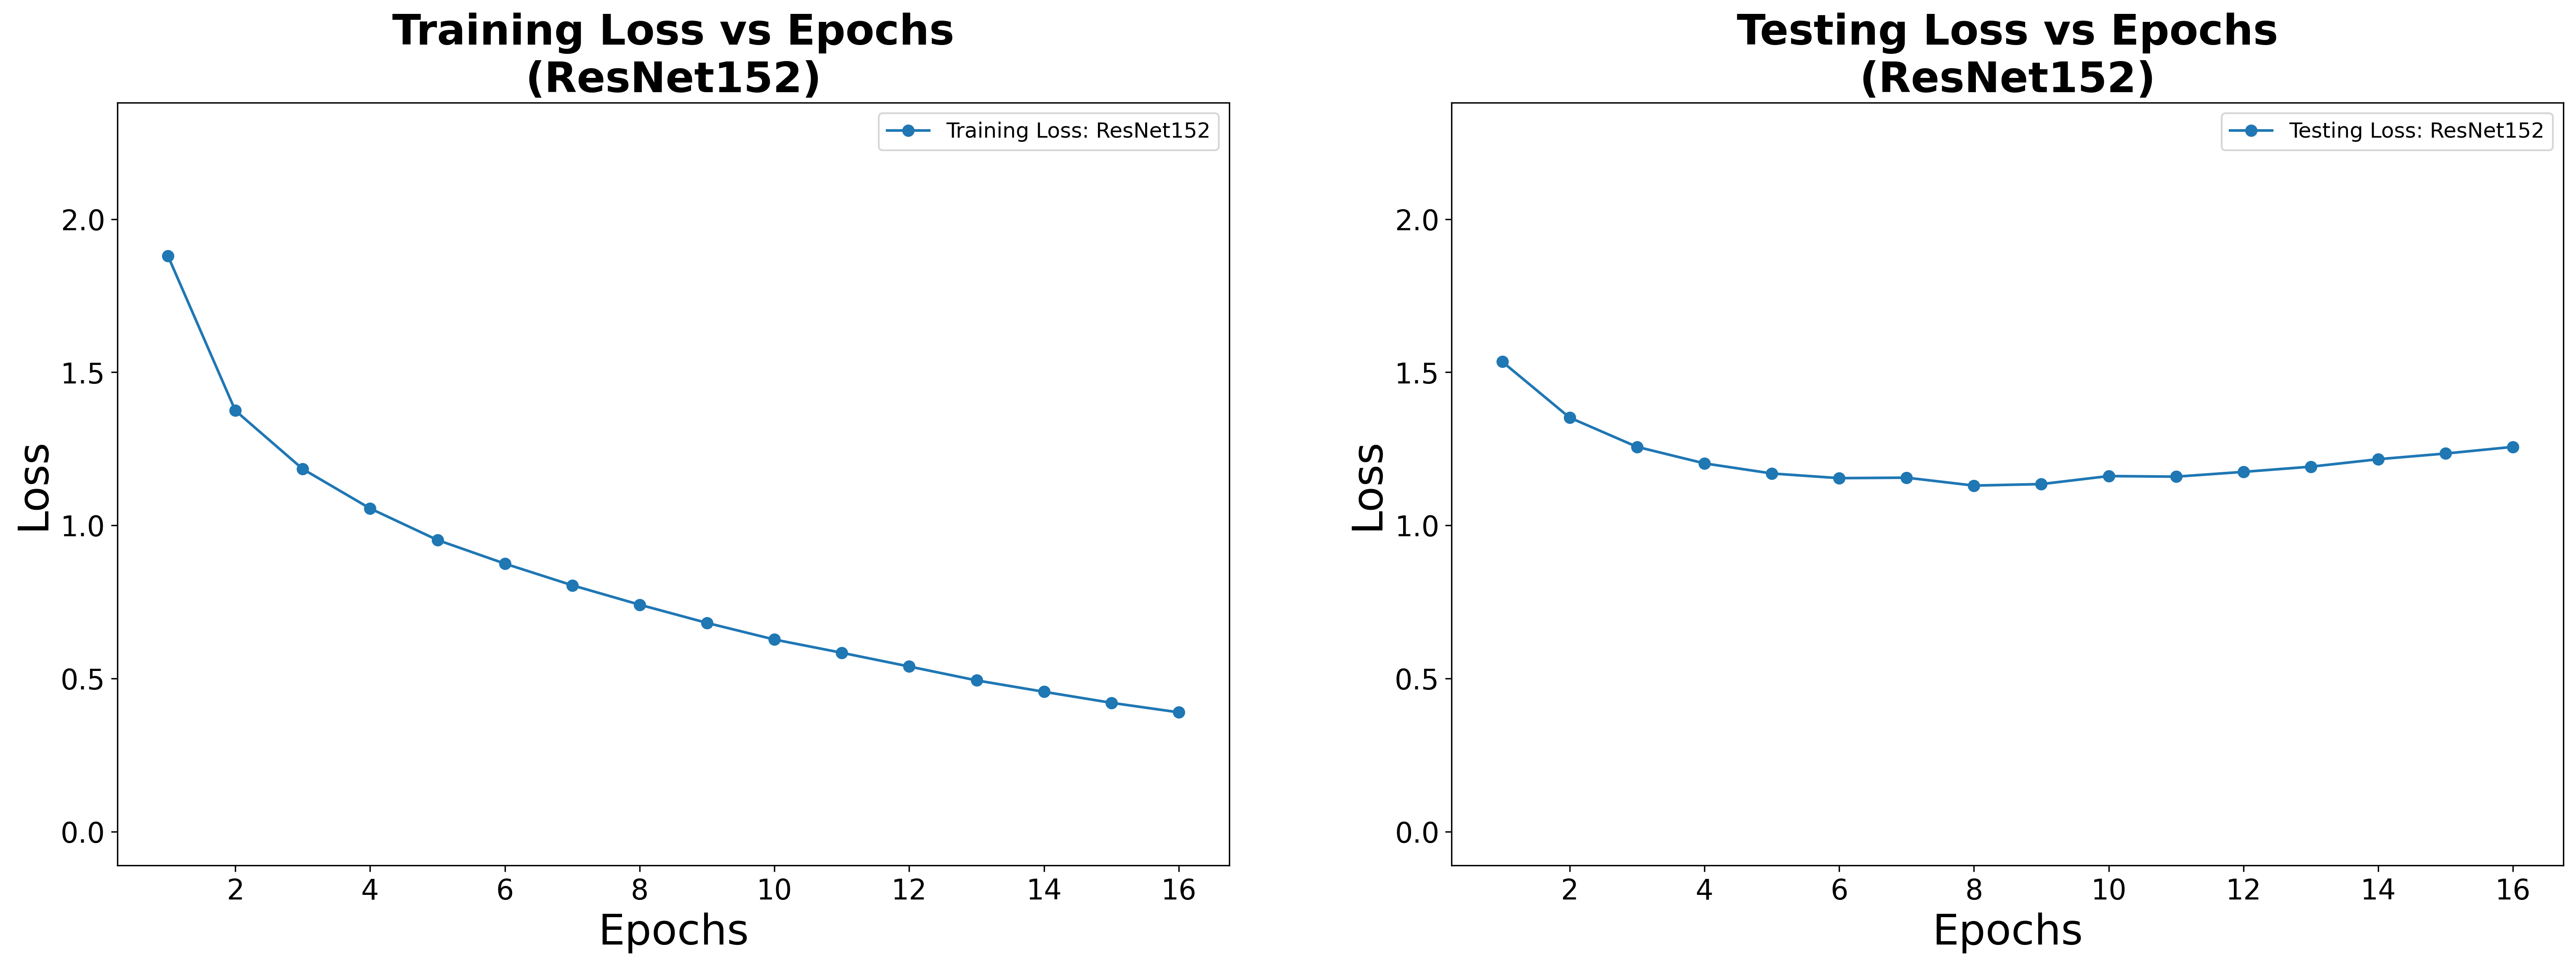

In [6]:
# getting max yval so that plots have same y-axis for better comparison 
max_yval = np.maximum(loss_df['Training Loss'], loss_df['Testing Loss']).max()
min_yval = np.minimum(loss_df['Training Loss'], loss_df['Testing Loss']).min()

# getting the two graphs for testing and training loss 
fig, ax = plt.subplots(1, 2, figsize = (25,8), dpi = 300)
for idx, loss in enumerate(['Training Loss', 'Testing Loss']):
    for model in models:
        ax[idx].plot(loss_df[loss_df['Model Name'] == model]['Epochs'], 
                        loss_df[loss_df['Model Name'] == model][loss], 
                        '-o', 
                        label = loss + ": " + model.replace('PretrainedCustom', '').replace('_Last2Layers', ''), 
                        linewidth = 1.5)
        ax[idx].set_xlabel("Epochs", fontsize = 24)
        ax[idx].set_ylabel("Loss", fontsize = 24)
        ax[idx].tick_params(
            axis = 'both',
            labelsize = 16)
        ax[idx].legend(fontsize = 12)
        ax[idx].set_ylim([min_yval - 0.5, max_yval + 0.5])
        ax[idx].set_title(f"{loss} vs Epochs\n(ResNet152)", fontsize = 24, fontweight = 'bold')
plt.savefig(f"output/Pretrained {loss} vs Epochs_side_by_side (95% of the data).jpg", dpi = 300, bbox_inches = 'tight')
plt.savefig(f"output/Pretrained {loss} vs Epochs_side_by_side (95% of the data).pdf", dpi = 300, bbox_inches = 'tight')    
plt.show()

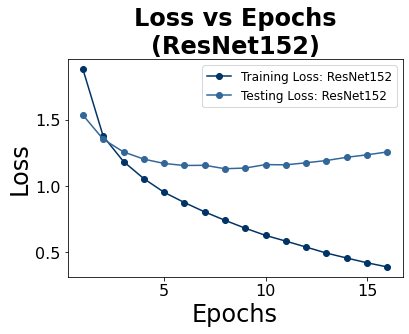

In [16]:
# getting the two graphs for testing and training loss 
plt.plot(loss_df['Epochs'], 
        loss_df["Training Loss"], 
        '-o', 
        label = "Training Loss: ResNet152", 
        color = "#003366",
        linewidth = 1.5)
plt.plot(loss_df['Epochs'], 
        loss_df["Testing Loss"], 
        '-o', 
        label = "Testing Loss: ResNet152",
        color = "#336699",
        linewidth = 1.5)
plt.xlabel("Epochs", fontsize = 24)
plt.ylabel("Loss", fontsize = 24)
plt.tick_params(
    axis = 'both',
    labelsize = 16)
plt.legend(fontsize = 12)
plt.title(f"Loss vs Epochs\n(ResNet152)", fontsize = 24, fontweight = 'bold')
plt.savefig(f"output/Pretrained {loss} vs Epochs_combined (95% of the data).jpg", dpi = 300, bbox_inches = 'tight')
plt.savefig(f"output/Pretrained {loss} vs Epochs_combined (95% of the data).pdf", dpi = 300, bbox_inches = 'tight')    
plt.show()

## Plotting Grouped Barcharts by Accuracy and Model Type

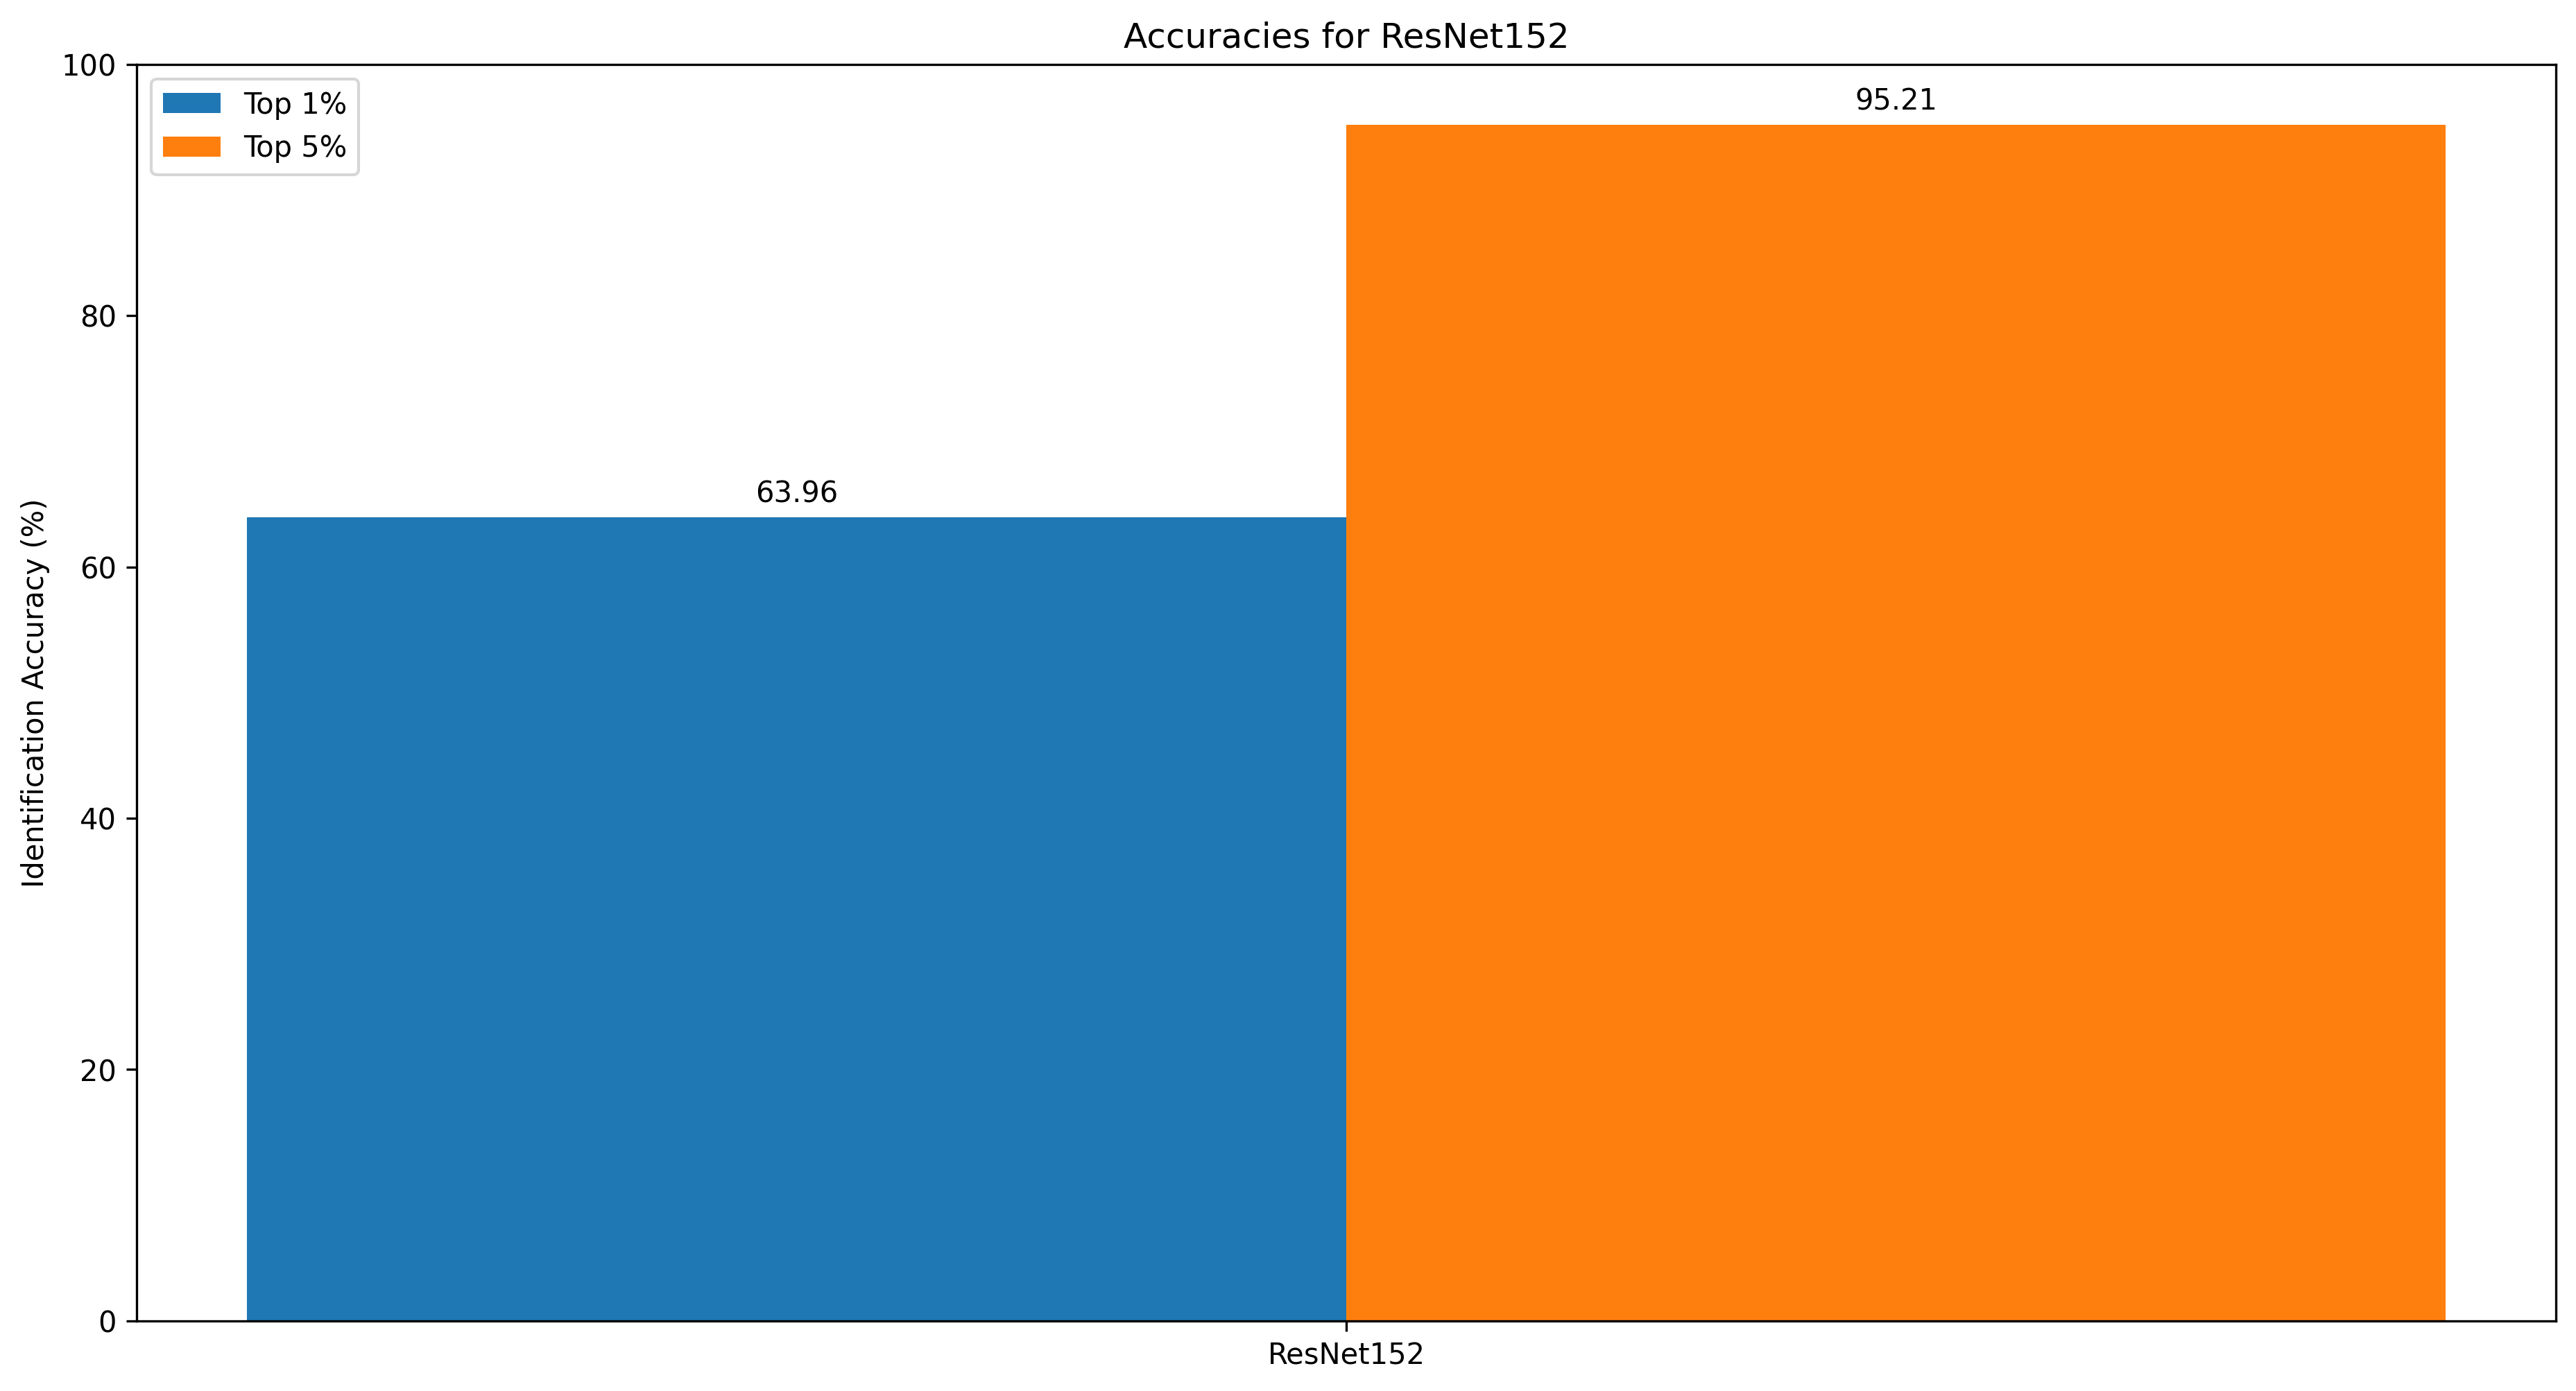

In [7]:
width = 0.3

# plotting grouped barcharts by model 
fig, ax = plt.subplots(figsize = (15,8), dpi = 300)
top1 = ax.bar(np.arange(len(classification_results_df)) - width/2, classification_results_df['Top 1%'], width, label = "Top 1%")
top5 = ax.bar(np.arange(len(classification_results_df)) + width/2, classification_results_df['Top 5%'], width, label = "Top 5%")

# adding axis attributes
ax.set_ylabel('Identification Accuracy (%)')
ax.set_title('Accuracies for ResNet152')
ax.set_ylim([0, 100])
ax.set_xticks(np.arange(len(classification_results_df)))
ax.set_xticklabels(classification_results_df['Model Name'].str.replace('_Last2Layers','').str.replace('PretrainedCustom', ''))

# adding labels on top of bars
ax.bar_label(top1, padding=3, fmt='%.2f')
ax.bar_label(top5, padding=3, fmt='%.2f')
ax.legend()

plt.savefig("output/Pretrained Model Accuracies (95% of the data).jpg", dpi = 300, bbox_inches = 'tight')
plt.savefig("output/Pretrained Model Accuracies (95% of the data).pdf", dpi = 300, bbox_inches = 'tight')
plt.show()